# DSBDAL Assignment 3 -Descriptive Statistics - Measures of Central Tendency and variability
## Part 1

### Data Preprocessing

In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('nba.csv')

In [3]:
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [4]:
df.isnull().sum().sort_values(ascending=False)

College     85
Salary      12
Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
dtype: int64

In [5]:
print('Our data set contains {} rows and {} columns'.format(df.shape[0],df.shape[1]))


Our data set contains 458 rows and 9 columns


In [6]:
df=df[df['Name'].notnull()]
df["College"].fillna("No College",inplace=True)

In [7]:
df['Salary'] = df['Salary'].fillna(df.groupby('Team')['Salary'].transform('mean'))
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7.730337e+06
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6.796117e+06
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,4.181505e+06
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1.148640e+06
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,No College,5.000000e+06
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2.239800e+06
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2.433333e+06
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,No College,9.000000e+05
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,No College,2.900000e+06


In [8]:
df.isnull().sum().sort_values(ascending=False)

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64

In [9]:
print('Our data set contains {} rows and {} columns'.format(df.shape[0],df.shape[1]))


Our data set contains 457 rows and 9 columns


In [10]:
# split the strings
df.Height = [s.split('-') for s in df.Height]
# convert to inches
df.Height = [float(value[0])*12 + float(value[1]) for value in df.Height]

In [11]:
df.Height

0      74.0
1      78.0
2      77.0
3      77.0
4      82.0
       ... 
452    82.0
453    75.0
454    73.0
455    87.0
456    84.0
Name: Height, Length: 457, dtype: float64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457 entries, 0 to 456
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    float64
 6   Weight    457 non-null    float64
 7   College   457 non-null    object 
 8   Salary    457 non-null    float64
dtypes: float64(5), object(4)
memory usage: 35.7+ KB


In [13]:
df.dtypes

Name         object
Team         object
Number      float64
Position     object
Age         float64
Height      float64
Weight      float64
College      object
Salary      float64
dtype: object

In [14]:
df = df.astype({'Number': 'int', 'Age': 'int','Weight':'int','Height':'int','Salary':'int'})


In [15]:
df[['Number','Age','Weight','Salary','Height']].dtypes

Number    int64
Age       int64
Weight    int64
Salary    int64
Height    int64
dtype: object

In [16]:
df['Position'].value_counts()

SG    102
PF    100
PG     92
SF     85
C      78
Name: Position, dtype: int64

In [17]:
df.describe()

,Number,Age,Height,Weight,Salary
count,457.000000,457.000000,457.000000,457.000000,4.570000e+02
mean,17.678337,26.938731,79.190372,221.522976,4.851922e+06
std,15.966090,4.404016,3.432442,26.368343,5.170364e+06
min,0.000000,19.000000,69.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,77.000000,200.000000,1.100602e+06
50%,13.000000,26.000000,80.000000,220.000000,2.854940e+06
75%,25.000000,30.000000,82.000000,240.000000,6.486486e+06
max,99.000000,40.000000,87.000000,307.000000,2.500000e+07


### Salary Stats by grouping according to teams

In [18]:
df.groupby(["Team"])["Salary"].describe()


,count,mean,std,min,25%,50%,75%,max
Team,,,,,,,,
Atlanta Hawks,15.0,4.860197e+06,5.194508e+06,525093.0,1152260.00,2854940.0,6873239.5,18671659.0
Boston Celtics,15.0,4.181505e+06,3.031593e+06,1148640.0,1994760.00,3425510.0,5898058.5,12000000.0
Brooklyn Nets,15.0,3.501898e+06,5.317817e+06,134215.0,947276.00,1335480.0,2512675.0,19689000.0
Charlotte Hornets,15.0,5.222728e+06,4.538601e+06,189455.0,1543138.00,4204200.0,6665702.0,13500000.0
Chicago Bulls,15.0,5.785559e+06,6.251088e+06,525093.0,1203290.50,2380440.0,7974380.0,20093064.0
Cleveland Cavaliers,15.0,7.642049e+06,7.449131e+06,111196.0,1211638.00,5000000.0,11624817.5,22970500.0
Dallas Mavericks,15.0,4.746582e+06,5.030279e+06,525093.0,1185783.00,3950313.0,5289487.0,16407500.0
Denver Nuggets,15.0,4.294424e+06,4.163062e+06,258489.0,1647099.50,3000000.0,4319711.5,14000000.0
Detroit Pistons,15.0,4.477884e+06,4.668478e+06,111444.0,1711452.50,2891760.0,5635000.0,16000000.0


In [19]:
bins=[19,26,33,40]
labels=['19-26','26-33','33-40']
df['Age_Group']=pd.cut(df['Age'],bins=bins,labels=labels)

In [20]:
df.Age_Group.value_counts()

19-26    233
26-33    180
33-40     42
Name: Age_Group, dtype: int64

### Salary Stats by grouping according to age group

In [21]:
df.groupby(['Age_Group'])['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Age_Group,,,,,,,,
19-26,233.0,3.641185e+06,4.269774e+06,30888.0,981348.00,1842000.0,4171680.00,17120106.0
26-33,180.0,6.468612e+06,5.836236e+06,55722.0,1636500.50,4975000.0,9522106.50,22970500.0
33-40,42.0,4.779077e+06,5.022117e+06,222888.0,1073091.25,3459250.0,5728609.25,25000000.0


In [22]:
df.groupby(['Age_Group'])['Salary'].median()

Age_Group
19-26    1842000
26-33    4975000
33-40    3459250
Name: Salary, dtype: int64

<AxesSubplot:xlabel='Age_Group'>

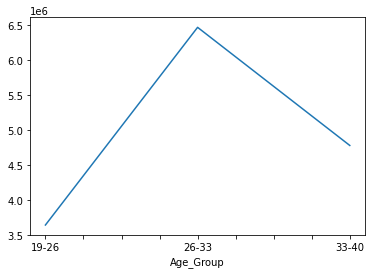

In [23]:
df.groupby(['Age_Group'])['Salary'].mean().plot()